In [1]:
import sys
sys.path.append('..')
import utils
import cholesky_method as cm
import hosking_method as hm

In [2]:
timespan = 10
interval = 0.01
paths = 10

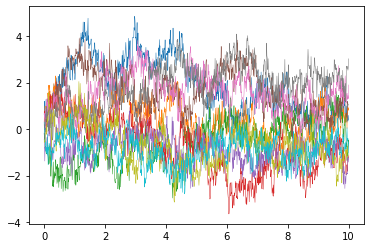

In [3]:
# Cholesky method
cm = cm.choleskyMethodfBM()
# H = 0.2
nfBm = []
for _ in range(0, paths):
    fBm = cm.generateFBm(timespan, interval, 0.2)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm)

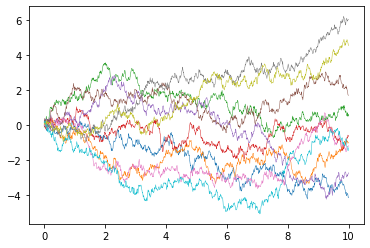

In [4]:
# H = 0.5
nfBm = []
for _ in range(0, paths):
    fBm = cm.generateFBm(timespan, interval, 0.5)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm)

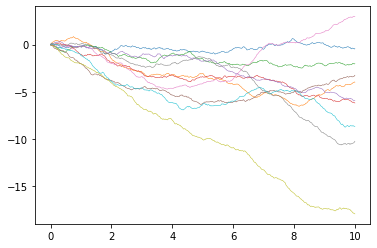

In [5]:
# H = 0.8
nfBm = []
for _ in range(0, paths):
    fBm = cm.generateFBm(timespan, interval, 0.8)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm)

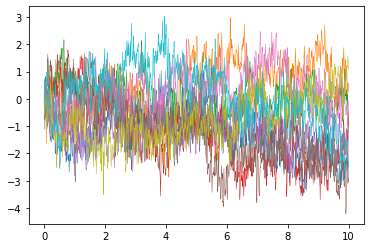

In [6]:
# Hosking method
hm = hm.hoskingMethodFBm()
# H = 0.2
nfBm = []
for _ in range(0, paths):
    fBm = hm.generateFBm(timespan, interval, 0.2)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm)

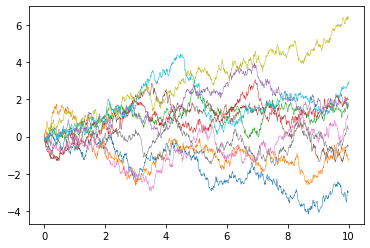

In [7]:
# H = 0.5
nfBm = []
for _ in range(0, paths):
    fBm = hm.generateFBm(timespan, interval, 0.5)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm)

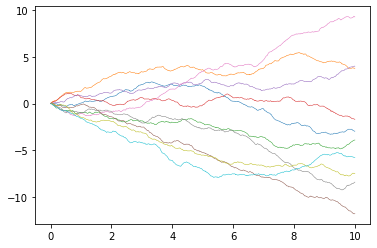

In [8]:
# H = 0.8
nfBm = []
for _ in range(0, paths):
    fBm = hm.generateFBm(timespan, interval, 0.8)
    nfBm.append(fBm)
utils.draw_n_paths(paths, timespan, interval, nfBm)

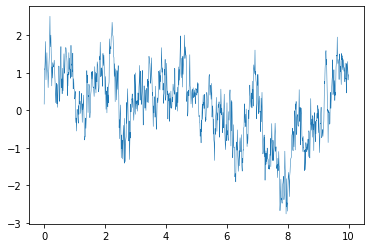

In [9]:
"""
Using rough Bergomi model to approximate the stock price:
1. Simulate the Volterra process X
"""
import rough_Bergomi_model as rBm

timespan = 10
interval = 0.01
X, Wt = rBm.volterra_process(timespan, interval)
# visualize the Volterra process
utils.draw_n_paths(1, timespan, interval, [X])

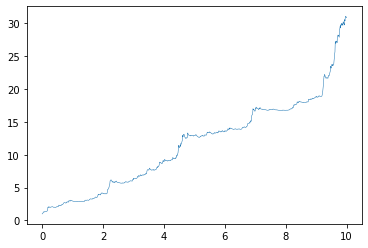

In [11]:
"""
2. Simulate the stock price
"""
logS, S = rBm.simulate_rBergomi_model(X, Wt, timespan, interval)
utils.draw_n_paths(1, timespan, interval, [S])